<a href="https://colab.research.google.com/github/hlybrower/IS-4487-Labs/blob/main/Week_9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from sklearn.preprocessing import LabelEncoder

In [5]:
#Upload AdviseInvest data
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv ('/content/drive/MyDrive/adviseinvest.csv')

print (df)

Mounted at /content/drive
       answered  income  female  age  job  num_dependents  rent  own_res  \
0             1   13520       0   23    0               1     1        0   
1             0   14780       0   22    2               1     0        1   
2             1   37570       0   62    2               1     0        0   
3             0   12450       0   33    2               1     0        1   
4             0   12400       0   48    1               2     0        0   
...         ...     ...     ...  ...  ...             ...   ...      ...   
29499         1   11630       0   44    2               1     0        1   
29500         0   28640       0   34    1               2     0        1   
29501         1   34480       0   74    1               1     0        1   
29502         1   10550       0   30    2               1     0        1   
29503         0  125790       0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  mobile  produc

In [6]:
#look at the top rows
df.head(10) 

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
7,1,11750,0,68,0,1,0,0,1.0,1,0,0,0,3
8,1,69670,0,36,3,1,1,0,0.0,1,1,3,0,4
9,1,3380,0,52,2,1,0,1,0.0,0,2,4,0,4


In [7]:
#look at last rows
df.tail(10) 


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
29494,1,10530,0,27,2,1,0,1,0.0,0,0,1,0,2
29495,1,33680,0,23,2,1,1,0,0.0,3,3,4,1,4
29496,0,15300,0,32,2,1,0,1,1.0,3,0,2,0,0
29497,1,5180,0,29,2,1,0,1,0.0,3,0,2,0,1
29498,0,31900,0,24,2,1,0,1,0.0,0,0,2,0,0
29499,1,11630,0,44,2,1,0,1,1.0,3,2,2,0,4
29500,0,28640,0,34,1,2,0,1,0.0,2,0,2,0,0
29501,1,34480,0,74,1,1,0,1,0.0,3,0,3,0,4
29502,1,10550,0,30,2,1,0,1,1.0,3,0,1,0,1
29503,0,125790,0,44,3,1,0,0,0.0,1,0,4,1,0


In [8]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  int64  
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 MB


In [9]:
#Look at summary
df.describe()


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,0.054230,34.770065,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458175,0.091106,1.535792
std,0.497829,29379.202710,0.226475,11.355777,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497353,0.287765,1.625916
min,0.000000,-65600.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [10]:
## Clean the data

#Remove rows with NAs
df = df.dropna()


In [11]:

#Remove row with single outlier in num_accts & remove rows with negative income values
df_clean = df[(df['num_accts']<20) & (df['income']>0)]
df_clean.describe()


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000,29499.000000
mean,0.546595,33772.499407,0.054171,34.768840,1.915421,1.141022,0.210448,0.681074,0.240788,1.468355,0.956270,2.344859,0.091088,1.535747
std,0.497833,29374.485379,0.226359,11.354486,0.658216,0.348050,0.407634,0.466068,0.427569,1.234700,1.483765,1.200390,0.287739,1.625958
min,0.000000,2760.000000,0.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,0.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,0.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,0.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,1.000000,74.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,1.000000,4.000000


<ipython-input-16-033d6f1e03ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['mobile'] = df_clean['mobile'].replace({0: 'no', 1: 'yes'})


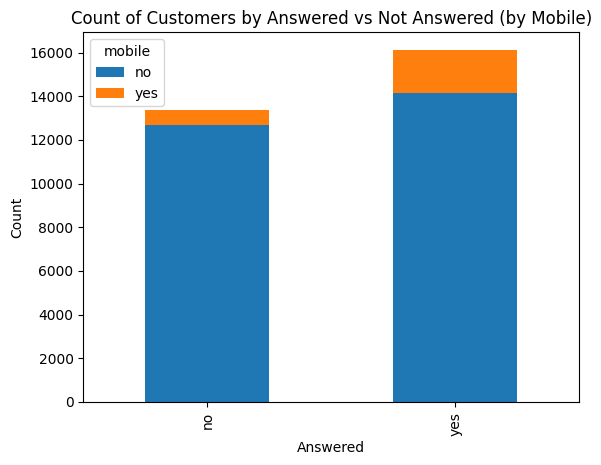

In [16]:
# Turn mobile into categorical variable
df_clean['mobile'] = df_clean['mobile'].replace({0: 'no', 1: 'yes'})
import matplotlib.pyplot as plt
grouped = df_clean.groupby(['answered', 'mobile']).size().unstack()

# Create a bar chart for the counts of answered vs not answered, based on 'mobile' column
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Answered')
plt.ylabel('Count')
plt.title('Count of Customers by Answered vs Not Answered (by Mobile)')
plt.show()



<ipython-input-15-498126c4a572>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['answered'] = df_clean['answered'].replace({0: 'no', 1: 'yes'})
<ipython-input-15-498126c4a572>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['answered'] = df_clean['answered'].astype('category')


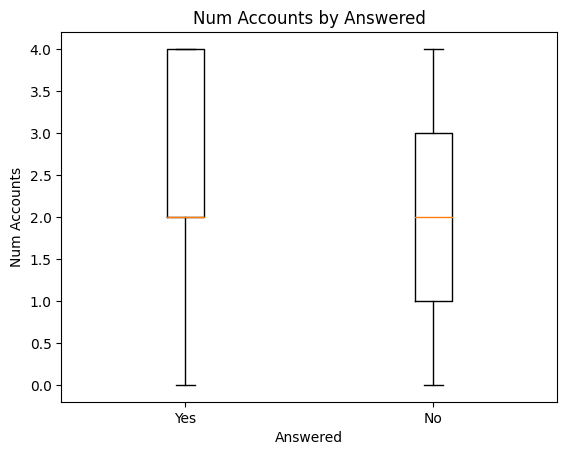

In [15]:
# Change answered into yes/no and make a chart w/ num accounts

# Replace 0 with "no" and 1 with "yes" in the 'answered' column
df_clean['answered'] = df_clean['answered'].replace({0: 'no', 1: 'yes'})

# Convert 'answered' column to categorical data type
df_clean['answered'] = df_clean['answered'].astype('category')

df_yes = df_clean[df_clean['answered'] == 'yes']
df_no = df_clean[df_clean['answered'] == 'no']

# Create a box plot for num_accts with answered = yes and no
plt.boxplot([df_yes['num_accts'], df_no['num_accts']], labels=['Yes', 'No'])
plt.xlabel('Answered')
plt.ylabel('Num Accounts')
plt.title('Num Accounts by Answered')
plt.show()